In [18]:
categories = [
    "Food & Dining",
    "Groceries",
    "Fuel",
    "Shopping",
    "Entertainment",
    "Bills & Utilities",
    "Healthcare",
    "Travel",
    "Education",
    "Rent",
    "Insurance",
    "Transfers"
]


In [19]:
transaction_patterns = {
    "Food & Dining": ["Starbucks", "Dominos", "Zomato", "Swiggy", "KFC", "Subway"],
    "Groceries": ["Big Bazaar", "DMart", "Reliance Fresh", "More Supermarket", "Spencer's"],
    "Fuel": ["HP Gas", "IndianOil", "Shell", "BPCL", "IOCL Pump"],
    "Shopping": ["Amazon", "Flipkart", "Myntra", "Ajio", "Zara", "H&M"],
    "Entertainment": ["Netflix", "Hotstar", "Spotify", "BookMyShow", "PVR Cinemas"],
    "Bills & Utilities": ["Paytm Recharge", "BSNL Bill", "Airtel", "Tata Power", "Water Bill"],
    "Healthcare": ["Apollo Pharmacy", "MedPlus", "1mg", "Fortis Hospital", "Pathlab"],
    "Travel": ["IRCTC", "Uber", "Ola", "MakeMyTrip", "IndiGo", "Air India"],
    "Education": ["Coursera", "Udemy", "Byjus", "Unacademy", "School Fee"],
    "Rent": ["Rent Payment", "Flat Rent", "Landlord", "PG Fee"],
    "Insurance": ["LIC", "HDFC Life", "ICICI Prudential", "Bajaj Allianz"],
    "Transfers": ["NEFT Transfer", "IMPS", "UPI to Friend", "Account Transfer"]
}


In [20]:
import random
import pandas as pd
from datetime import datetime, timedelta

# Categories and merchants
transaction_patterns = {
    "Food & Dining": ["Starbucks", "Dominos", "Zomato", "Swiggy", "KFC", "Subway", "Cafe Coffee Day"],
    "Groceries": ["Big Bazaar", "DMart", "Reliance Fresh", "More Supermarket", "Spencer's", "Nature's Basket"],
    "Fuel": ["HP Gas", "IndianOil", "Shell", "BPCL", "IOCL Pump"],
    "Shopping": ["Amazon", "Flipkart", "Myntra", "Ajio", "Zara", "H&M", "Nykaa"],
    "Entertainment": ["Netflix", "Hotstar", "Spotify", "BookMyShow", "PVR Cinemas"],
    "Bills & Utilities": ["Paytm Recharge", "BSNL Bill", "Airtel", "Tata Power", "Water Bill", "Electricity Board"],
    "Healthcare": ["Apollo Pharmacy", "MedPlus", "1mg", "Fortis Hospital", "Pathlab", "CureFit"],
    "Travel": ["IRCTC", "Uber", "Ola", "MakeMyTrip", "IndiGo", "Air India", "RedBus"],
    "Education": ["Coursera", "Udemy", "Byjus", "Unacademy", "School Fee", "College Fee"],
    "Rent": ["Rent Payment", "Flat Rent", "Landlord", "PG Fee"],
    "Insurance": ["LIC", "HDFC Life", "ICICI Prudential", "Bajaj Allianz", "PolicyBazaar"],
    "Transfers": ["NEFT Transfer", "IMPS", "UPI to Friend", "Account Transfer", "Money Sent"]
}

def add_noise(description):
    tokens = description.split()

    # 1. Random case changes
    if random.random() < 0.3:
        description = description.upper()
    elif random.random() < 0.3:
        description = description.lower()

    # 2. Add random numbers (transaction IDs)
    if random.random() < 0.5:
        description += f" {random.randint(10000,99999)}"

    # 3. Add POS/UPI/NEFT codes
    noise_tags = ["POS", "UPI", "NEFT", "IMPS", "AUTH", "TRANS", "TXN"]
    if random.random() < 0.4:
        description += " " + random.choice(noise_tags)

    # 4. Add typos
    typo_map = {
        "starbucks": "strabucks",
        "coffee": "cofe",
        "walmart": "walmt",
        "amazon": "amazn",
        "netflix": "netflixx",
    }
    for good, bad in typo_map.items():
        if good in description.lower() and random.random() < 0.3:
            description = description.lower().replace(good, bad)

    return description
    
df["description"] = df["description"].apply(add_noise)
# Generate data
records = []
start_date = datetime(2024, 1, 1)
for category, merchants in transaction_patterns.items():
    for _ in range(800):  # ~9600 total rows
        merchant = random.choice(merchants)
        txn_type = random.choice(["POS", "UPI", "NEFT", "IMPS", "CARD"])
        txn_id = random.randint(1000, 9999)
        amount = round(random.uniform(50, 5000), 2)
        date = start_date + timedelta(days=random.randint(0, 300))
        desc = f"{merchant} {txn_type} TXN{txn_id}"
        desc = add_noise(desc)
        records.append({
            "transaction_id": len(records)+1,
            "description": desc,
            "amount": amount,
            "date": date.strftime("%Y-%m-%d"),
            "category": category
        })

# Create dataframe and shuffle
df = pd.DataFrame(records)
df = df.sample(frac=1).reset_index(drop=True)

# Save to CSV
df.to_csv("synthetic_transactions.csv", index=False)
print("✅ Synthetic dataset created: synthetic_transactions.csv")
print(f"Total samples: {len(df)}")
print(df.head())


✅ Synthetic dataset created: synthetic_transactions.csv
Total samples: 9600
   transaction_id                           description   amount        date  \
0            6342          RedBus UPI TXN3273 56594 UPI   941.31  2024-09-01   
1            4227  electricity board card txn3644 43130  4422.36  2024-01-05   
2            6287          AIR INDIA IMPS TXN7685 97345  3564.72  2024-05-06   
3            3144                     NYKAA POS TXN8594  4896.16  2024-10-26   
4            1096           Nature's Basket UPI TXN5954   425.57  2024-07-29   

            category  
0             Travel  
1  Bills & Utilities  
2             Travel  
3           Shopping  
4          Groceries  


In [21]:
import pandas as pd
import numpy as np
import re
import string
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score


In [22]:
df = pd.read_csv("synthetic_transactions.csv")
print("✅ Dataset Loaded Successfully!")
print(df.head(), "\n")
print("Total Samples:", len(df))

✅ Dataset Loaded Successfully!
   transaction_id                           description   amount        date  \
0            6342          RedBus UPI TXN3273 56594 UPI   941.31  2024-09-01   
1            4227  electricity board card txn3644 43130  4422.36  2024-01-05   
2            6287          AIR INDIA IMPS TXN7685 97345  3564.72  2024-05-06   
3            3144                     NYKAA POS TXN8594  4896.16  2024-10-26   
4            1096           Nature's Basket UPI TXN5954   425.57  2024-07-29   

            category  
0             Travel  
1  Bills & Utilities  
2             Travel  
3           Shopping  
4          Groceries   

Total Samples: 9600


In [23]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)  # remove special chars
    text = re.sub(r'\s+', ' ', text).strip()      # remove extra spaces
    return text

df['clean_description'] = df['description'].apply(clean_text)


In [24]:
# 3️⃣ SPLIT INTO TRAIN / TEST
# --------------------------------------------------------------
X = df['clean_description']
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")

Training samples: 7680, Test samples: 1920


In [25]:
# 4️⃣ TF-IDF VECTORIZATION
# --------------------------------------------------------------
vectorizer = TfidfVectorizer(
    ngram_range=(1, 3),
    max_features=7000,
    stop_words='english'
)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# --------------------------------------------------------------
# 5️⃣ MODEL TRAINING (Logistic Regression)
# --------------------------------------------------------------
model = LogisticRegression(
    max_iter=5000,
    class_weight="balanced",     # ensures new categories with few samples still learn
    C=0.5,                       # stronger regularization for noisy text
    penalty="l2",
    solver="lbfgs",
    n_jobs=-1                    # uses all CPU cores
)
model.fit(X_train_vec, y_train)


LogisticRegression(C=0.5, class_weight='balanced', max_iter=5000, n_jobs=-1)

In [12]:
y_pred = model.predict(X_test_vec)

print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred, digits=3))

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"\n✅ Test Accuracy: {acc*100:.2f}%")
print(f"✅ Weighted F1 Score: {f1*100:.2f}%")



📊 Classification Report:

                   precision    recall  f1-score   support

Bills & Utilities      1.000     1.000     1.000       160
        Education      1.000     1.000     1.000       160
    Entertainment      1.000     1.000     1.000       160
    Food & Dining      1.000     1.000     1.000       160
             Fuel      1.000     1.000     1.000       160
        Groceries      1.000     1.000     1.000       160
       Healthcare      1.000     1.000     1.000       160
        Insurance      1.000     1.000     1.000       160
             Rent      1.000     1.000     1.000       160
         Shopping      1.000     1.000     1.000       160
        Transfers      1.000     1.000     1.000       160
           Travel      1.000     1.000     1.000       160

         accuracy                          1.000      1920
        macro avg      1.000     1.000     1.000      1920
     weighted avg      1.000     1.000     1.000      1920


✅ Test Accuracy: 100.00%


In [13]:
# 7️⃣ TEST MODEL ON UNSEEN / UNKNOWN DATA
# --------------------------------------------------------------
test_samples = [
    "Starbucks POS TXN2345",
    "Netflix Monthly Subscription",
    "Apollo Pharmacy Bill",
    "IRCTC Ticket Booking",
    "LIC Annual Premium",
    "Amazon Order TXN4421",
    "Uber Ride Payment"
]

test_samples_clean = [clean_text(t) for t in test_samples]
test_vec = vectorizer.transform(test_samples_clean)
preds = model.predict(test_vec)

print("\n🚀 Model Predictions on Unknown Transactions:")
for t, p in zip(test_samples, preds):
    print(f"{t:<40} → {p}")


🚀 Model Predictions on Unknown Transactions:
Starbucks POS TXN2345                    → Food & Dining
Netflix Monthly Subscription             → Entertainment
Apollo Pharmacy Bill                     → Healthcare
IRCTC Ticket Booking                     → Travel
LIC Annual Premium                       → Insurance
Amazon Order TXN4421                     → Shopping
Uber Ride Payment                        → Travel


In [14]:
# 8️⃣ SAVE MODEL + VECTORIZER
# --------------------------------------------------------------
joblib.dump(model, "transaction_classifier_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("\n💾 Model and Vectorizer Saved Successfully!")
print("Files generated: transaction_classifier_model.pkl, tfidf_vectorizer.pkl")


💾 Model and Vectorizer Saved Successfully!
Files generated: transaction_classifier_model.pkl, tfidf_vectorizer.pkl


In [15]:
!pip install seaborn


In [15]:
import joblib
import pandas as pd

# Load saved model & vectorizer
model = joblib.load("transaction_classifier_model.pkl")
vect = joblib.load("tfidf_vectorizer.pkl")

# Load your training dataset
df = pd.read_csv("synthetic_transactions.csv")

# Clean text (same cleaning function you used in app)
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["clean"] = df["description"].apply(clean_text)


                   precision    recall  f1-score   support

Bills & Utilities       1.00      1.00      1.00       160
        Education       1.00      1.00      1.00       160
    Entertainment       1.00      1.00      1.00       160
    Food & Dining       1.00      1.00      1.00       160
             Fuel       1.00      1.00      1.00       160
        Groceries       1.00      1.00      1.00       160
       Healthcare       1.00      1.00      1.00       160
        Insurance       1.00      1.00      1.00       160
             Rent       1.00      1.00      1.00       160
         Shopping       1.00      1.00      1.00       160
        Transfers       1.00      1.00      1.00       160
           Travel       1.00      1.00      1.00       160

         accuracy                           1.00      1920
        macro avg       1.00      1.00      1.00      1920
     weighted avg       1.00      1.00      1.00      1920



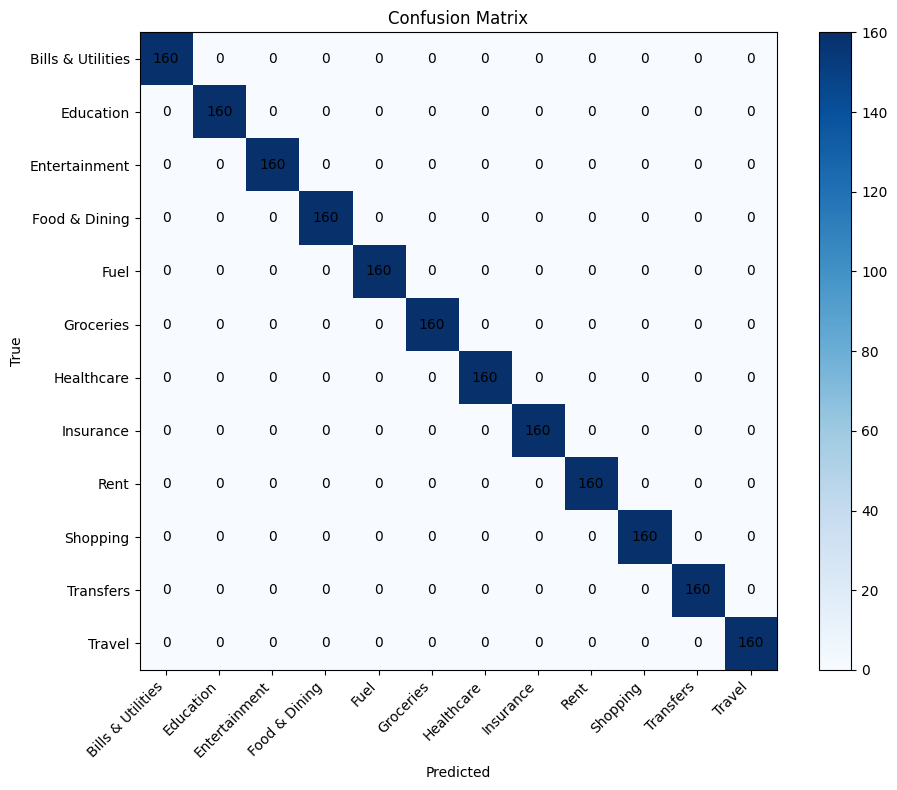

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

X = vect.transform(df["clean"])
y = df["category"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

model.fit(X_train, y_train)
pred = model.predict(X_test)

print(classification_report(y_test, pred))

cm = confusion_matrix(y_test, pred)
labels = sorted(y.unique())

plt.figure(figsize=(10, 8))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center')

plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
plt.yticks(range(len(labels)), labels)

plt.colorbar()
plt.tight_layout()
plt.show()
